In [2]:
import sys

sys.path.append("src")

In [3]:
from consumer import DataLoader

In [4]:
dl = DataLoader()

In [5]:
dl?

Type:        DataLoader
String form: <consumer.api_consumer.DataLoader object at 0x7fdfa6a15a00>
File:        ~/src/pysrc/covid_modeling/src/consumer/api_consumer.py
Docstring:  
Implements methods to fetch data from https://api.covid19india.org/ for 
states/country, timeseries/daily as pandas DataFrame or a dictionary of 
DataFrames.

Once instantiated, it makes *one call* to the API server, and caches entire 
timeseries data or entire daily data in the object itself. Once you've constructed the
desired DataFrames, consider 'del <object>' to save on memory.

Or you can get the dictionary of all DataFrames using the property 

LIMITATIONS:
    1. 2021-07-16: Only gets the statewise data
TODO: Get and process distric-wise data.

Examples:
>>> # Instantiate
>>> dl = DataLoader()


In [6]:
ind_data = dl.get_data(state_codes='TT')

In [7]:
ind_data.columns

Index(['date', 'population', 'delta.confirmed', 'delta7.confirmed',
       'total.confirmed', 'delta.recovered', 'delta7.recovered',
       'total.recovered', 'delta.deceased', 'delta.tested', 'delta7.deceased',
       'delta7.tested', 'total.deceased', 'total.tested', 'delta.other',
       'delta7.other', 'total.other', 'delta.vaccinated1',
       'delta7.vaccinated1', 'total.vaccinated1', 'delta.vaccinated2',
       'delta7.vaccinated2', 'total.vaccinated2'],
      dtype='object')

In [11]:
ind_data.plot?

Signature:      ind_data.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x7fdf9d572ee0>
File:           ~/.condaroot/envs/ml/lib/python3.8/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : ar

<AxesSubplot:title={'center':'India Delta'}>

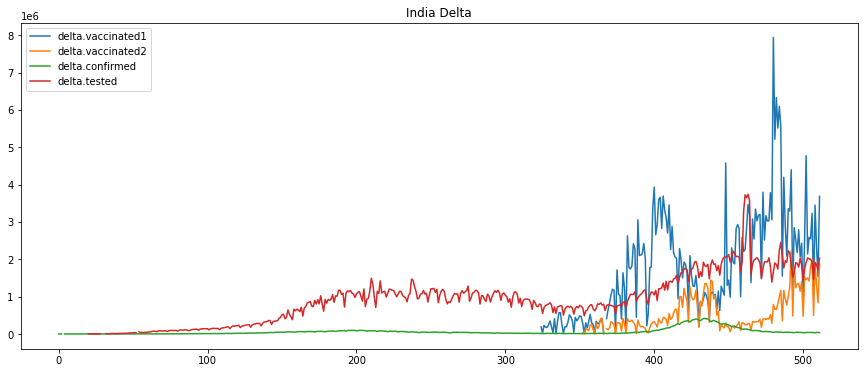

In [13]:
%matplotlib inline
ind_data[['delta.vaccinated1', 'delta.vaccinated2', 'delta.confirmed', 'delta.tested']].plot(legend=True, figsize=(15, 6), title="India Delta")

In [14]:
ka_data = dl.get_all_timeseries()['KA']

src/consumer/api_consumer.py:167: UserWarning: Data is up-to-date. Using local files.
  warnings.warn("Data is up-to-date. Using local files.")


In [15]:
%matplotlib widget
ka_data[['delta.vaccinated1', 'delta.vaccinated2', 'delta.confirmed', 'delta.tested']].plot(legend=True, figsize=(15, 6), title="KA Delta")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:title={'center':'KA Delta'}>